# Sales Data Analysis with Pandas and Matplotlib
This notebook demonstrates how to analyze sales data using Pandas and Matplotlib. Steps include loading the CSV, cleaning data, grouping sales, and visualizing results.

In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV file with proper encoding to avoid UnicodeDecodeError
df = pd.read_csv('dataset.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [105]:
# Cleaning NaN values
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [106]:
# Grouping sales by Category, Sub-Category, and Region
grouped = df_clean.groupby(['Category', 'Sub-Category', 'Region'])['Sales'].sum().reset_index()
grouped.head()

,Category,Sub-Category,Region,Sales
0,Furniture,Bookcases,Central,24157.1768
1,Furniture,Bookcases,East,43819.3340
2,Furniture,Bookcases,South,10899.3620
3,Furniture,Bookcases,West,36004.1235
4,Furniture,Chairs,Central,85230.6460


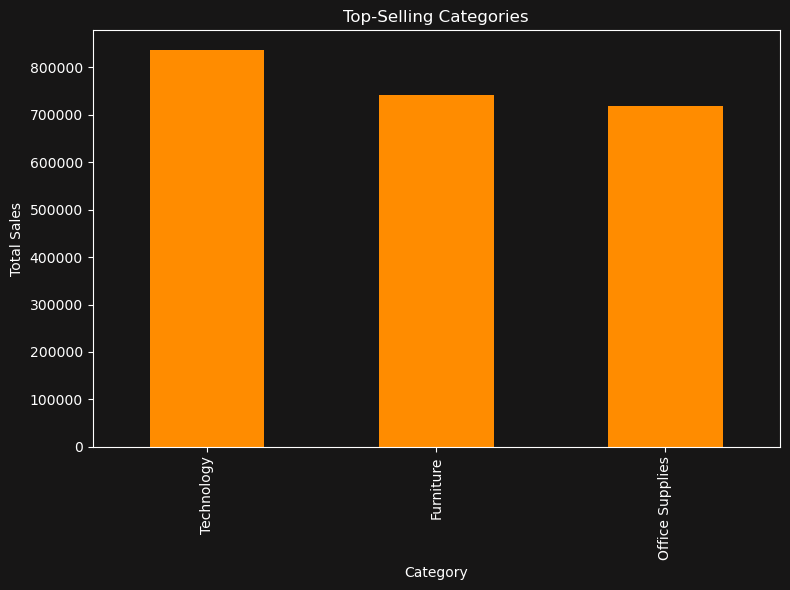

In [107]:
# Ploting top-selling categories (bar chart)
top_categories = df_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6), facecolor="#171616FF")
ax = top_categories.plot(kind='bar', color='darkorange')
plt.title('Top-Selling Categories', color='white')
plt.ylabel('Total Sales', color='white')
plt.xlabel('Category', color='white')
plt.tight_layout()
ax.set_facecolor('#0090')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white')
plt.savefig('results/top_selling_categories.png')
plt.show()

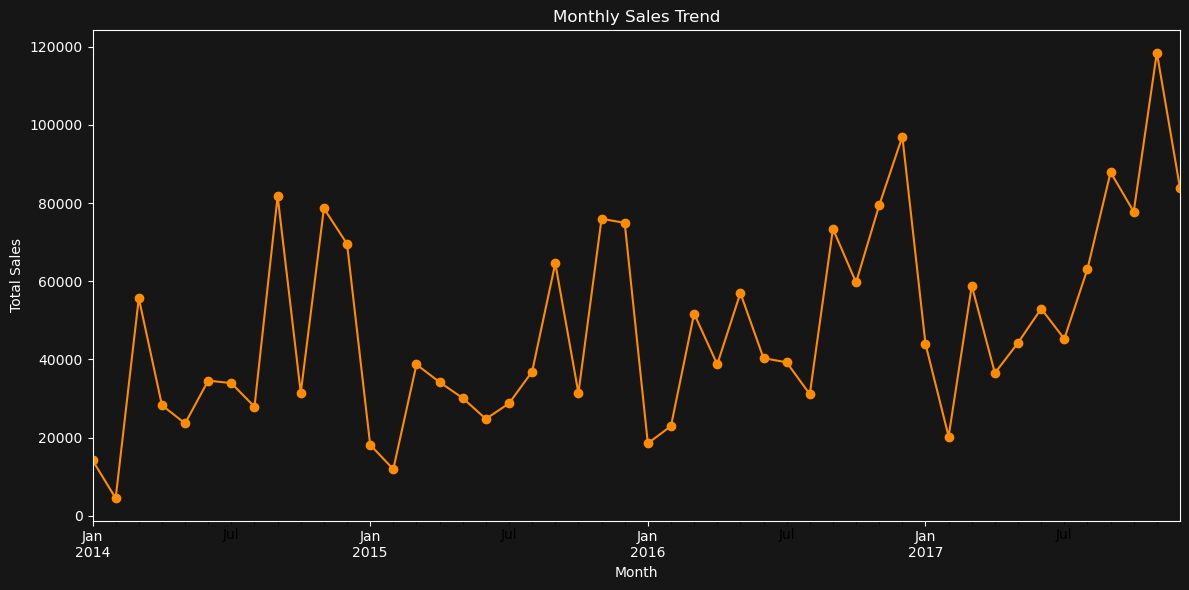

In [108]:
# Ploting monthly sales trend (line chart)
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])
monthly_sales = df_clean.groupby(df_clean['Order Date'].dt.to_period('M'))['Sales'].sum()
plt.figure(figsize=(12,6), facecolor='#171616FF')
ax = monthly_sales.plot(kind='line', marker='o', color='darkorange')
plt.title('Monthly Sales Trend', color='white')
plt.ylabel('Total Sales', color='white')
plt.xlabel('Month', color='white')
plt.tight_layout()
ax.set_facecolor('#0090')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white')
plt.savefig('results/monthly_sales_trend.png')
plt.show()